# **Airbnb Open Data**

## **Descrição**

A plataforma Airbnb, é um site/aplicativo disponível tanto para computadores, quanto para celulares, que surgiu com a proposta de facilitar a vida as pessoas que buscam alugar imóveis em diversas partes do mundo, e ao mesmo tempo que traz ao dono do imóvel uma forma prática de gerenciar seus imóveis. O app permite a visualização do interior do imóvel, alem de descrições que possibilitam uma avaliação a distância, e com um único clique proceder com a reserva. O dataset analizado possui 102599 linhas e 26 colunas/variáveis descritas abaixo:

Id: Número de identificação único reservado para um anúncio na plataforma Airbnb.  
Name: Título do anúncio registrado na plataforma Airbnb.  
Host Id: Número de identificação único reservado para cada anfitrião na plataforma Airbnb.  
Host Identity Verified: indicação da confirmação da verificação de identidade para cada anfitrião na plataforma Airbnb.  
Host Name: Primeiro nome do anfitrião.  
Neighbourhood Group: Nome da região/zona da localização do imóvel.  
Neighbourhood: Nome do bairro da localização do imóvel.  
Lat: Número da Latitude da localização do imóvel.  
Long: Número da longitude da localização do imóvel.  
Country: Nome do país da localização do imóvel.  
Country Code: Código do país da localização do imóvel.  
Instant Bookable: Número indicador da disponibilidade de reserva instantâneo do imóvel.   
Cancellation Policy: Indicador do grau de severidade da política de cancelamento do imóvel.  
Room Type: Número indicador do tipo de quarto disponíbilizado no imóvel.  
Construction Year: Ano de construção do imóvel.  
Price: Valor pago pelo dia da locação do imóvel.  
Service Fee: Valor total da taxa de serviço paga no ato da locação do imóvel.  
Minimum Nights: Quantidade total de noites mínimas necessárias para a locação do imóvel.  
Number Of Reviews: Quantidade total de avaliações recebida pelo imóvel na plataforma Airbnb.  
Last Review: Data da última avaliação recebida pelo imóvel na plataforma Airbnb.  
Reviews Per Month: Taxa de avaliações recebida por mes desde a criação do anúncio.  
Review Rate Number: Valor médio da nota recebida pelo anúncio na plataforma Airbnb.  
Calculated Host Listings Count: Número total de anúncios feito pelo mesmo anfitrião na plataforma Airbnb.  
Availability 365: Número total de dias até a disponibilização do imóvel para locação.  
House Rules: Regras únicas para a utilização do imóvel editadas pelo anfitrião.  
License: Código único da licensa do imóvel informada pelo anfitrião.  

## **Importação de bibliotecas**

Nesta análise, as seguintes bibliotecas serão utilizadas: Pandas, para importação e manipulação de dataframes; Numpy, para calculos matematicos; Matplotlib, Seaborn e Pywaffle, para configuração e visualização gráfica dos dados; Folium, para visualização geográfica e Wordcloud, para visualização textual.

In [24]:
%pip install pywaffle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium as flm
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS

# Para visualizar com wsl:
# import os
# import subprocess as sbp
# import webbrowser

Note: you may need to restart the kernel to use updated packages.


Os separadores são necessários para melhor visualização dos resultados, entao serão criados três níveis de separação, a de nível 1 para separar níveis, a 3 para separar subníveis

In [25]:
# Separadores
def div(sep = 1):
    if sep == 1:
        print("-"*140)
    if sep == 2:
        print("-"*70)
    if sep == 3:
        print("="*140)

O dataset utilizado é o `Airbnb_Open_Data.csv` retirado da base da dados do Kaggle: 'https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata?select=Airbnb_Open_Data.csv'.  

In [26]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Airbnb_Open_Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arianazmoudeh/airbnbopendata",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

pd.set_option("display.max_columns", None)

df_clear = False

/tmp/ipykernel_2902/882261406.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


/home/cerbellus/envs/dados/lib/python3.12/site-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


In [27]:
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [29]:
df.rename({})

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


## **Limpeza de dados**

Para realizar a limpeza dos dados, foi criada uma biblioteca específica de nome "airbnb_cleaner".

In [30]:
import airbnb_cleaner as airbnb

In [31]:
if df_clear == False:
    # Renomear nomes das variáveis
    df.columns = df.columns.str.replace("_", " ").str.strip().str.title()
    # Remover valores duplicados
    df.drop_duplicates(inplace=True)
    print("Valores antes da limpeza:")
    div()
    print(f"Variáveis únicas: {df.columns.tolist()}")
    print(f"Total de variáveis do dataframe: {df.shape[1]}")
    print(f"Total de linhas do dataframe: {df.shape[0]}")
    print(f"Total de linhas duplicadas: {df[df.duplicated()].shape[0]}")
    div(2)
    print(f"Host Identity Verified - Valores únicos: {df['Host Identity Verified'].unique().tolist()}")
    print(f"Host Identity Verified - Total de valores únicos: {df['Host Identity Verified'].nunique(dropna=False)}")
    print(f"Host Identity Verified - Total de valores nulos: {df['Host Identity Verified'].isna().sum()}")
    div(2)
    print(f"Neighbourhood Group - Valores únicos: {df['Neighbourhood Group'].sort_values().unique().tolist()}")
    print(f"Neighbourhood Group - Total de valores únicos: {df['Neighbourhood Group'].nunique(dropna=False)}")
    print(f"Neighbourhood Group - Total de valores nulos: {df['Neighbourhood Group'].isna().sum()}")
    div(2)
    print(f"Neighbourhood - Total de valores únicos: {df['Neighbourhood'].nunique(dropna=False)}")
    print(f"Neighbourhood - Total de valores nulos: {df['Neighbourhood'].isna().sum()}")
    div(2)
    print(f"Lat - Total de valores únicos: {df['Lat'].nunique(dropna=False)}")
    print(f"Lat - Total de valores nulos: {df['Lat'].isna().sum()}")
    print(f"Long - Total de valores únicos:  {df['Long'].nunique(dropna=False)}")
    print(f"Long - Total de valores nulos:  {df['Long'].isna().sum()}")
    div(2)
    print(f"Instant Bookable - Valores únicos: {df['Instant Bookable'].unique().tolist()}")
    print(f"Instant Bookable - Total de valores únicos: {df['Instant Bookable'].nunique(dropna=False)}")
    print(f"Instant Bookable - Total de valores nulos: {df['Instant Bookable'].isna().sum()}")
    div(2)
    print(f"Cancellation Policy - Valores únicos: {df['Cancellation Policy'].unique().tolist()}")
    print(f"Cancellation Policy - Total de valores únicos: {df['Cancellation Policy'].nunique(dropna=False)}")
    print(f"Cancellation Policy - Valores nulos: {df['Cancellation Policy'].isna().sum()}")
    div(2)
    print(f"Construction Year - Valores únicos: {df['Construction Year'].nunique(dropna=False)}")
    print(f"Construction Year - Valores nulos: {df['Construction Year'].isna().sum()}")
    div(2)
    print(f"Price - Total de valores únicos: {df['Price'].sort_values().nunique(dropna=False)}")
    print(f"Price - Total de valores nulos: {df['Price'].isna().sum()}")
    div(2)
    print(f"Service Fee - Total de valores únicos: {df['Service Fee'].nunique(dropna=False)}")
    print(f"Service Fee - Total de valores nulos: {df['Service Fee'].isna().sum()}")
    div(2)
    print(f"Minimum Nights - Total de valores únicos: {df['Minimum Nights'].nunique(dropna=False)}")
    print(f"Minimum Nights - Total de valores nulos: {df['Minimum Nights'].isna().sum()}")
    print(f"Minimum Nights - Total de valores menores que 0: {df.loc[df['Minimum Nights'] <= 0, 'Minimum Nights'].shape[0]}")
    div(2)
    print(f"Number of Reviews - Total de valores únicos: {df['Number Of Reviews'].nunique(dropna=False)}")
    print(f"Number of Reviews - Total de valores nulos: {df['Number Of Reviews'].isna().sum()}")
    div(2)
    print(f"Reviews Per Month - Total de valores únicos: {df['Reviews Per Month'].nunique(dropna=False)}")
    print(f"Reviews Per Month - Total de valores nulos: {df['Reviews Per Month'].isna().sum()}")
    div(2)
    print(f"Review Rate Number - Valores únicos: {df['Review Rate Number'].sort_values().unique().tolist()}")
    print(f"Review Rate Number - Total de valores únicos: {df['Review Rate Number'].nunique(dropna=False)}")
    print(f"Review Rate Number - Total de valores nulos: {df['Review Rate Number'].isna().sum()}")
    div(2)
    print(f"Calculated Host Listings Count - Total de valores únicos: {df['Calculated Host Listings Count'].nunique(dropna=False)}")
    print(f"Calculated Host Listings Count - Total de valores nulos: {df['Calculated Host Listings Count'].isna().sum()}")
    div(2)
    print(f"Availability 365 - Total de valores únicos: {df['Availability 365'].nunique(dropna=False)}")
    print(f"Availability 365 - Total de valores nulos: {df['Availability 365'].isna().sum()}")
    print(f"Availability 365 - Total de valores menores que 0: {df.loc[df['Availability 365'] < 0, 'Availability 365'].count()}")
    print(f"Availability 365 - Total de valores maiores que 365: {df.loc[df['Availability 365'] > 365, "Availability 365"].count()}")
    div()
else:
    div()
    print("Os dados foram limpos.")
    div()

Valores antes da limpeza:
--------------------------------------------------------------------------------------------------------------------------------------------
Variáveis únicas: ['Id', 'Name', 'Host Id', 'Host Identity Verified', 'Host Name', 'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Country', 'Country Code', 'Instant Bookable', 'Cancellation Policy', 'Room Type', 'Construction Year', 'Price', 'Service Fee', 'Minimum Nights', 'Number Of Reviews', 'Last Review', 'Reviews Per Month', 'Review Rate Number', 'Calculated Host Listings Count', 'Availability 365', 'House Rules', 'License']
Total de variáveis do dataframe: 26
Total de linhas do dataframe: 102058
Total de linhas duplicadas: 0
----------------------------------------------------------------------
Host Identity Verified - Valores únicos: ['unconfirmed', 'verified', nan]
Host Identity Verified - Total de valores únicos: 3
Host Identity Verified - Total de valores nulos: 289
-------------------------------------

In [34]:
df, df_clear = airbnb.df_cleaner(df, verbose=True)

Variável 'Name' removida!
Variável 'Host Name' removida!
Variável 'Country' removida!
Variável 'Country Code' removida!
Variável 'Last Review' removida!
Variável 'House Rules' removida!
Variável 'License' removida!
Valores NaN da variável 'Host Identity Verified' substituídos por 'unconfirmed'!
Valores NaN da variável 'Neighbourhood Group' substituídos!
Valores NaN da variável 'Neighbourhood' removidos!
Valores NaN da variável 'Lat' e 'Long' removidos!
Valores NaN da variável 'Instant Bookable' substituídos por False!
Valores NaN da variável 'Cancellation Policy' substituídos por 'moderate'!
Valores NaN da variável 'Construction Year' substituídos por '2012'!
Valores NaN da variável 'Service Fee' removidos!
Variável 'Service Fee' renomeada para 'Service Fee In $'!
Valor '$' removido!
Valores NaN e valores menores que 0 da variável 'Minimum Nights' substituídos por 1!
Valores NaN da variável 'Number of Reviews' substituídos por 0!
Valores NaN e de 'Number Of Reviews' igual a 0 da variáv

In [ ]:
if df_clear == True:
    print("Valores após a limpeza:")
    div()
    print(f"Variáveis únicas: {df.columns.tolist()}")
    print(f"Total de variáveis do dataframe: {df.shape[1]}")
    print(f"Total de linhas do dataframe: {df.shape[0]}")
    print(f"Total de linhas duplicadas: {df[df.duplicated()].shape[0]}")
    div(2)
    print(f"Host Identity Verified - Valores únicos: {df['Host Identity Verified'].unique().tolist()}")
    print(f"Host Identity Verified - Total de valores únicos: {df['Host Identity Verified'].nunique(dropna=False)}")
    print(f"Host Identity Verified - Total de valores nulos: {df['Host Identity Verified'].isna().sum()}")
    div(2)
    print(f"Neighbourhood Group - Valores únicos: {df['Neighbourhood Group'].sort_values().unique().tolist()}")
    print(f"Neighbourhood Group - Total de valores únicos: {df['Neighbourhood Group'].nunique(dropna=False)}")
    print(f"Neighbourhood Group - Total de valores nulos: {df['Neighbourhood Group'].isna().sum()}")
    div(2)
    print(f"Neighbourhood - Total de valores únicos: {df['Neighbourhood'].nunique(dropna=False)}")
    print(f"Neighbourhood - Total de valores nulos: {df['Neighbourhood'].isna().sum()}")
    div(2)
    print(f"Lat - Total de valores únicos: {df['Lat'].nunique(dropna=False)}")
    print(f"Lat - Total de valores nulos: {df['Lat'].isna().sum()}")
    print(f"Long - Total de valores únicos:  {df['Long'].nunique(dropna=False)}")
    print(f"Long - Total de valores nulos:  {df['Long'].isna().sum()}")
    div(2)
    print(f"Instant Bookable - Valores únicos: {df['Instant Bookable'].unique().tolist()}")
    print(f"Instant Bookable - Total de valores únicos: {df['Instant Bookable'].nunique(dropna=False)}")
    print(f"Instant Bookable - Total de valores nulos: {df['Instant Bookable'].isna().sum()}")
    div(2)
    print(f"Cancellation Policy - Valores únicos: {df['Cancellation Policy'].unique().tolist()}")
    print(f"Cancellation Policy - Total de valores únicos: {df['Cancellation Policy'].nunique(dropna=False)}")
    print(f"Cancellation Policy - Valores nulos: {df['Cancellation Policy'].isna().sum()}")
    div(2)
    print(f"Construction Year - Valores únicos: {df['Construction Year'].nunique(dropna=False)}")
    print(f"Construction Year - Valores nulos: {df['Construction Year'].isna().sum()}")
    div(2)
    print(f"Price In $ - Total de valores únicos: {df['Price In $'].sort_values().nunique(dropna=False)}")
    print(f"Price In $ - Total de valores nulos: {df['Price In $'].isna().sum()}")
    div(2)
    print(f"Service Fee In $ - Total de valores únicos: {df['Service Fee In $'].nunique(dropna=False)}")
    print(f"Service Fee In $ - Total de valores nulos: {df['Service Fee In $'].isna().sum()}")
    div(2)
    print(f"Minimum Nights - Total de valores únicos: {df['Minimum Nights'].nunique(dropna=False)}")
    print(f"Minimum Nights - Total de valores nulos: {df['Minimum Nights'].isna().sum()}")
    print(f"Minimum Nights - Total de valores menores que 0: {df.loc[df['Minimum Nights'] <= 0, 'Minimum Nights'].shape[0]}")
    div(2)
    print(f"Number of Reviews - Total de valores únicos: {df['Number Of Reviews'].nunique(dropna=False)}")
    print(f"Number of Reviews - Total de valores nulos: {df['Number Of Reviews'].isna().sum()}")
    div(2)
    print(f"Reviews Per Month - Total de valores únicos: {df['Reviews Per Month'].nunique(dropna=False)}")
    print(f"Reviews Per Month - Total de valores nulos: {df['Reviews Per Month'].isna().sum()}")
    div(2)
    print(f"Review Rate Number - Valores únicos: {df['Review Rate Number'].sort_values().unique().tolist()}")
    print(f"Review Rate Number - Total de valores únicos: {df['Review Rate Number'].nunique(dropna=False)}")
    print(f"Review Rate Number - Total de valores nulos: {df['Review Rate Number'].isna().sum()}")
    div(2)
    print(f"Calculated Host Listings Count - Total de valores únicos: {df['Calculated Host Listings Count'].nunique(dropna=False)}")
    print(f"Calculated Host Listings Count - Total de valores nulos: {df['Calculated Host Listings Count'].isna().sum()}")
    div(2)
    print(f"Availability 365 - Total de valores únicos: {df['Availability 365'].nunique(dropna=False)}")
    print(f"Availability 365 - Total de valores nulos: {df['Availability 365'].isna().sum()}")
    print(f"Availability 365 - Total de valores menores que 0: {df.loc[df['Availability 365'] < 0, 'Availability 365'].count()}")
    print(f"Availability 365 - Total de valores maiores que 365: {df.loc[df['Availability 365'] > 365, "Availability 365"].count()}")
    div()
else:
    div()
    print("Os dados ainda nâo foram limpos.")
    div()

Valores após a limpeza:
--------------------------------------------------------------------------------------------------------------------------------------------
Variáveis únicas: ['Id', 'Host Id', 'Host Identity Verified', 'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Instant Bookable', 'Cancellation Policy', 'Room Type', 'Construction Year', 'Price In $', 'Service Fee In $', 'Minimum Nights', 'Number Of Reviews', 'Reviews Per Month', 'Review Rate Number', 'Calculated Host Listings Count', 'Availability 365']
Total de variáveis do dataframe: 19
Total de linhas do dataframe: 101230
Total de linhas duplicadas: 0
----------------------------------------------------------------------
Host Identity Verified - Valores únicos: ['Unconfirmed', 'Verified']
Host Identity Verified - Total de valores únicos: 2
Host Identity Verified - Total de valores nulos: 0
----------------------------------------------------------------------
Neighbourhood Group - Valores únicos: ['Bronx', 'Brook

## **Visualizações e Insights**

Por meio do mapa de calor, é possível verificar de forma visual, a correlação entre os valores numéricos do dataframe, para expandir a analise, alguns valores nominais, podem ser convertidos em valores categóricos.

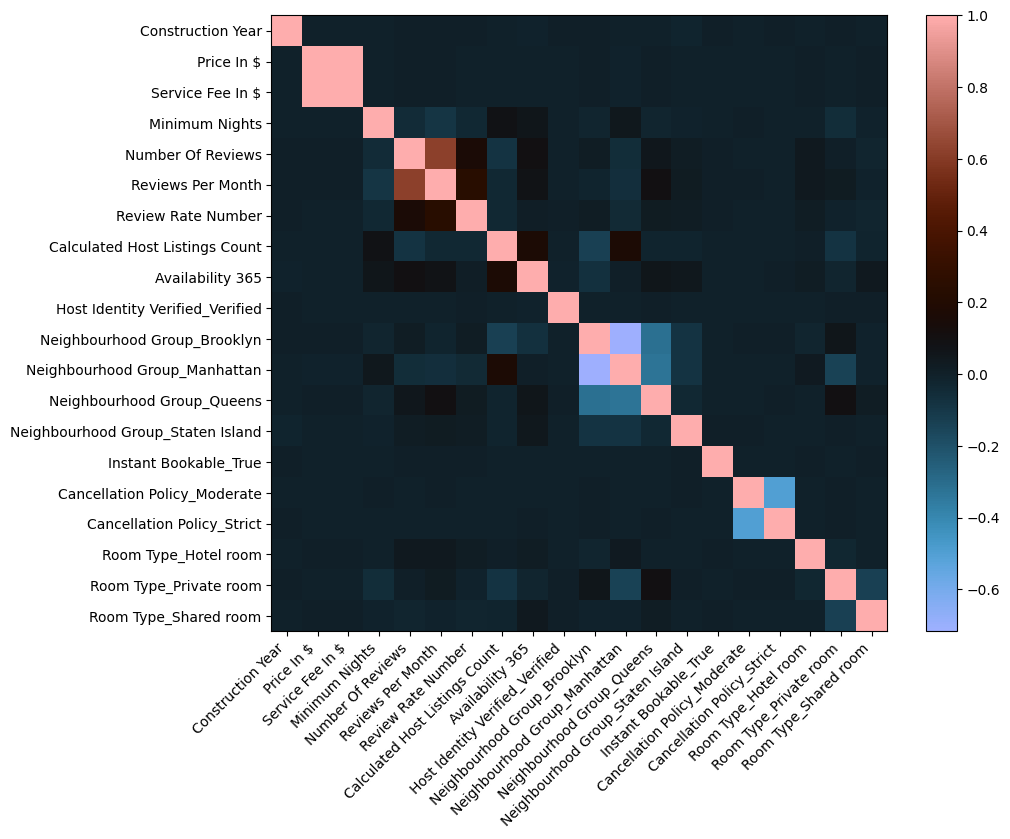

In [ ]:
list_not_corr = ["Id", "Host Id", "Neighbourhood", "Lat", "Long"]
df_corr = df.drop(columns=list_not_corr)
df_corr = pd.get_dummies(df_corr, columns=["Host Identity Verified", "Neighbourhood Group", "Instant Bookable", "Cancellation Policy", "Room Type"], drop_first=True, dtype=int)
corr = df_corr.select_dtypes(include="number").corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="berlin")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks()

plt.show()

A análise do mapa de calor permite confirmar que `Service Fee In $` apresenta uma correlação praticamente perfeita com `Price In $`, o que indica uma relação linear praticamente constante entre elas. Tais resultados permitem que `Service Fee In $` possa ser descartado. Além disso é possivel notar que `Price In $`, `Host Identity Verified_Verified` e `Instant Bookable_True` apresentam baixíssima ou quase nenhuma correlação com as demais variáveis, o que indica ausencia de relações lineares fortes entre elas.

In [ ]:
if "Service Fee In $" in df.columns:
    df.drop(columns="Service Fee In $", inplace=True)
    print("'Service Fee In $' removida!")
else:
    print("Variável 'Service Fee In $' já foi removida!")

'Service Fee In $' removida!


O gráfico de caixa ou boxplot, permite uma análise mais detalhada dos dados, exibindo a distribuição atravéz da sua mediana e de seus quartís, permitindo analisar valores discrepantes e outlayers.

<Axes: xlabel='Availability 365'>

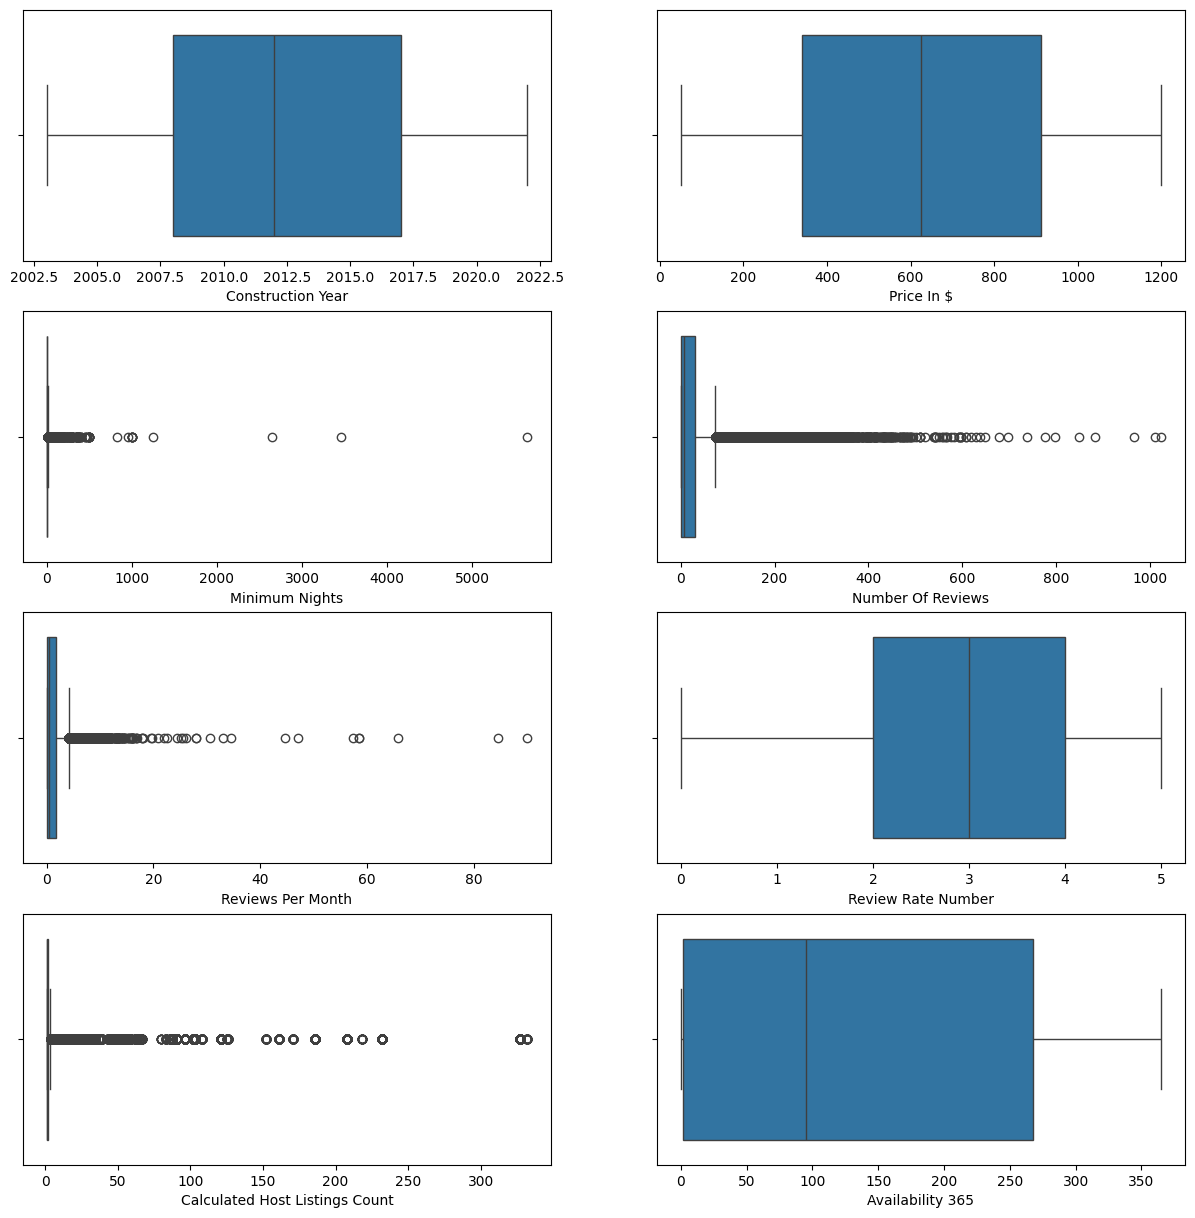

In [ ]:
hist_list = df.drop(columns=["Id", "Host Id", "Lat", "Long"]).select_dtypes(include="number")

fig, axs = plt.subplots(4, 2, figsize=(15, 15))

sns.boxplot(data=hist_list.iloc[:, 0], orient="h", ax=axs[0][0])
sns.boxplot(data=hist_list.iloc[:, 1], orient="h", ax=axs[0][1])
sns.boxplot(data=hist_list.iloc[:, 2], orient="h", ax=axs[1][0])
sns.boxplot(data=hist_list.iloc[:, 3], orient="h", ax=axs[1][1])
sns.boxplot(data=hist_list.iloc[:, 4], orient="h", ax=axs[2][0])
sns.boxplot(data=hist_list.iloc[:, 5], orient="h", ax=axs[2][1])
sns.boxplot(data=hist_list.iloc[:, 6], orient="h", ax=axs[3][0])
sns.boxplot(data=hist_list.iloc[:, 7], orient="h", ax=axs[3][1])

A variável `Minimum Nights` possui outliers que chamam atenção, por representarem a quantidade de dias corridos, e existirem entre seus dados valores superiores a 730 dias, um valor elevado a primeira vista, já que a plataforma Airbnb é conhecida por trabalhar com alugueis faceis e curtos, entretanto somente com esta informação disponibilizada, não há evidências suficientes que permitam confirmar a existencia de algum erro.
As variáveis `Number of Reviews` e `Review Per Month` demonstram que dentre os imoveis disponiveis para locação, existem aqueles que recebem uma quantidade elevada de reviews, o que pode indicar que estes sejam extremamente requisitados, demonstrando a rotatividade, com alugueis rápidos e consecutivos, e ou a maior taxa de aceitação deste imóvel. Considerando o segundo caso, pode-se verificar se a aceitação se deve a localidade, ao tipo de quarto ofertado ou ao preço sugerido para locação, e com esses dados, desenvolver um conjunto de melhores práticas, a ser disponibilizado aos anfitriões dos imóveis, a fim de elevar a expectativa do cliente em imóveis pouco procurados.
Já a variável `Calculated Host Listings Count` demonstra que alguns anfitriões possuem uma quantidade elevada de imóveis listadas. Esses dados revelam que é possível aumentar a disponibilidade de imóveis, incentivando que anfitriões que já tenham imóveis listados na plataforma, disponibilizem outros para locação, o que pode ser feito por meio de incentivos de novas listagens, atravéz de planos com desconto progressivos para cada nova listagem.

A variável `Neighbourhood Group` permite extrair considerações importantes, combinando-a as variáveis `Cancellation Policy`, `Room Type`, `Construction Year`, `Price In $`, `Review Rate Number` e `Id`.

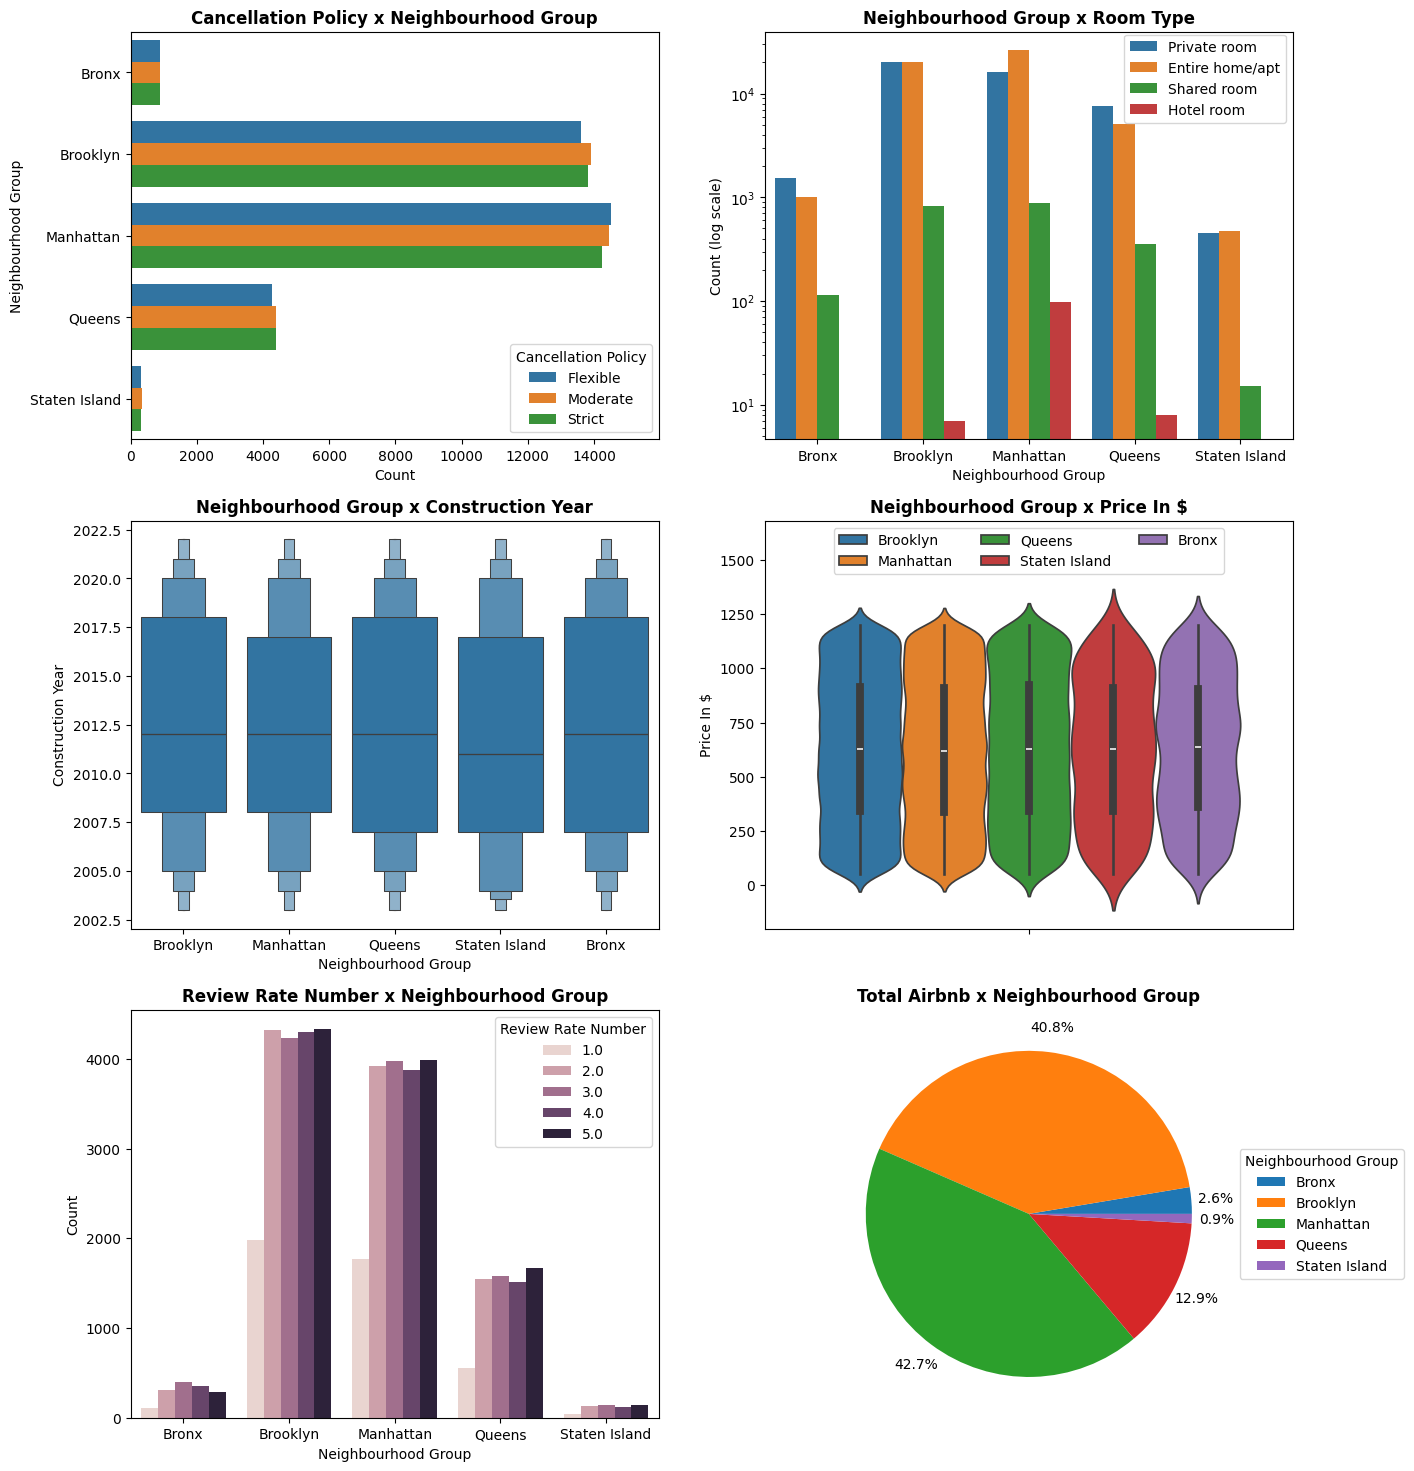

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

ng_cp = df.groupby(["Neighbourhood Group"])["Cancellation Policy"].value_counts().reset_index(name="Count")
sns.barplot(data=ng_cp, x="Count", y="Neighbourhood Group", hue="Cancellation Policy", ax=axs[0][0])
axs[0][0].set_title("Cancellation Policy x Neighbourhood Group", weight="bold")
axs[0][0].set_xlim(0, ng_cp["Count"].max()*1.1)
axs[0][0].xaxis

ng_rt = df.groupby(["Neighbourhood Group"])["Room Type"].value_counts().reset_index(name="Count")
sns.barplot(data=ng_rt, x="Neighbourhood Group", y="Count", hue="Room Type", ax=axs[0][1])
axs[0][1].set_title("Neighbourhood Group x Room Type", weight="bold")
axs[0][1].set(yscale="log", ylabel="Count (log scale)")
axs[0][1].legend(loc="upper right", bbox_to_anchor=(1, 1.01))

ng_cy = df.loc[:, ["Neighbourhood Group", "Construction Year"]]
sns.boxenplot(data=ng_cy, x="Neighbourhood Group", y="Construction Year", ax=axs[1][0])
axs[1][0].set_title("Neighbourhood Group x Construction Year", weight="bold")

ng_p = df.loc[:, ["Neighbourhood Group", "Price In $"]]
sns.violinplot(data=ng_p, y="Price In $", hue="Neighbourhood Group", ax=axs[1][1])
axs[1][1].set_title("Neighbourhood Group x Price In $", weight="bold")
axs[1][1].set_ylim(ng_p["Price In $"].min()*-4, ng_p["Price In $"].max()*1.4)
axs[1][1].legend(loc="upper center", ncols=3)

ng_rrn = df.loc[df["Number Of Reviews"] >= 10]
ng_rrn = ng_rrn.groupby(["Neighbourhood Group"])["Review Rate Number"].value_counts().reset_index(name="Count")
sns.barplot(data=ng_rrn, x="Neighbourhood Group", y="Count", hue="Review Rate Number", ax=axs[2][0])
axs[2][0].set_title("Review Rate Number x Neighbourhood Group", weight="bold")

ng_id = df.groupby(["Neighbourhood Group"])["Id"].nunique()
ng_id.plot(kind="pie", autopct="%1.1f%%", pctdistance=1.15, labels=None, ax=axs[2][1])
axs[2][1].legend(ng_id.index, title="Neighbourhood Group", loc="center left", bbox_to_anchor=(1.0, .5))
axs[2][1].set(ylabel=None)
axs[2][1].set_title("Total Airbnb x Neighbourhood Group", weight="bold")


plt.show()


A variável `Neighbourhood Group` agrupa em apenas 5 regiões, um total de 224 bairros, permitindo uma análise limpa da distribuição geográfica dos anúncios do Airbnb. Quando comparada com `Room Type`, é possível verificar que os tipos de Airbnb mais disponibilizados para locação, são `Private room` e `Entire home/apt`, essas informações sugere que talvez a baixa oferta entre quartos do tipo `Hotel room` seja uma lacuna de mercado, principalmente em regiões como o Bronx e Staten Island, locais onde quartos desse tipo são inexistentes. Os imóveis disponibilizados para locação no Airbnb dependem de anúncios de terceiros, então é impossível para a plataforma disponibilizar todas as modalidades de quartos, sendo assim, seria interessante aumentar a disponibilidade de quartos de todos os tipos, então oferecer valores diferenciados ou ofertas para anúncios de `Room Type` pouco ofertados, poderia incentivar esse aumento.

Para visualizar a relação entre as variáveis `Price In $` e `Room Type`, será feita uma distribuição da variável `Price In $` em categorias de ranges variando entre seu mínimo e máximo, utilizando o método `cut`, que possibilita reduzir e reagrupar os dados em grupos menores.

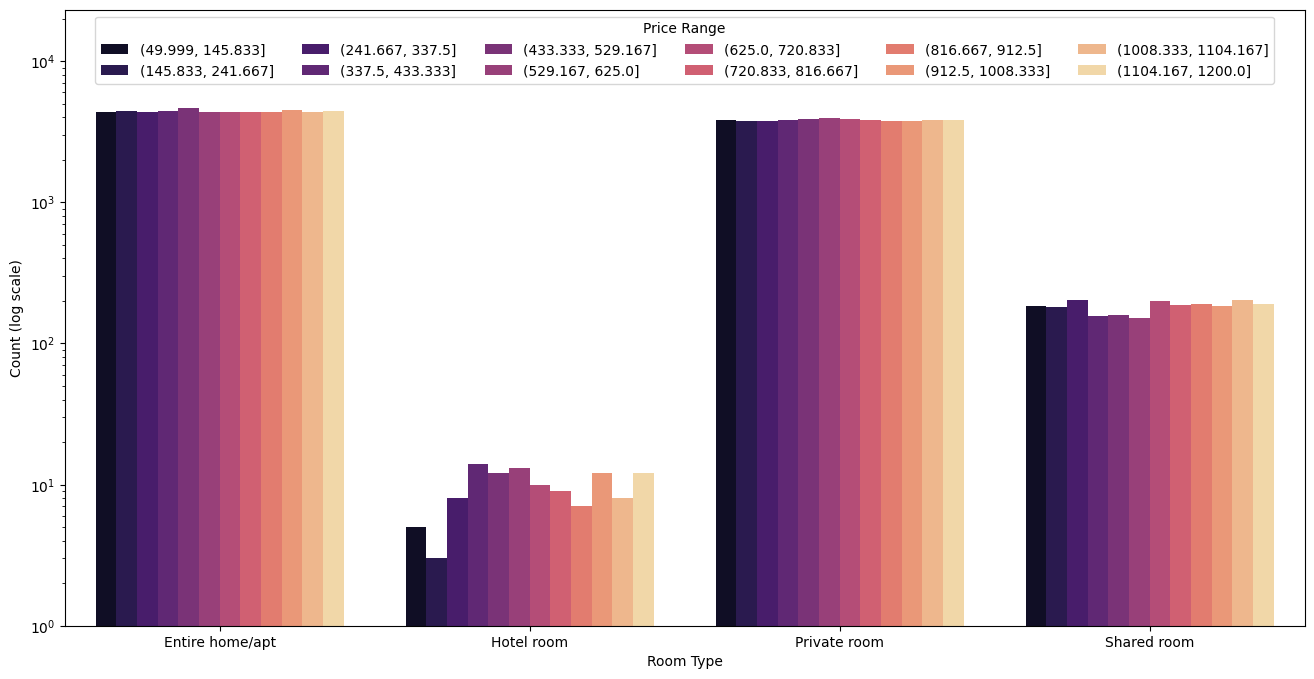

In [ ]:
# "Room Type", => ["Construction Year", "Price In $", "Minimum Nights", "Availability 365"]  
fig, ax = plt.subplots(figsize=(16, 8))

lim = np.linspace(df["Price In $"].min(), df["Price In $"].max(), 13)
df["Price Range"] = pd.cut(df["Price In $"], bins=lim, include_lowest=True)
rt_p = df.groupby(["Room Type"])["Price Range"].value_counts().reset_index(name="Count")
sns.barplot(data=rt_p, x="Room Type", y="Count", hue="Price Range", palette="magma", ax=ax)
ax.set(yscale="log", ylabel="Count (log scale)", ylim=(1, rt_p["Count"].max()*5))
ax.legend(title="Price Range", loc="upper center", ncols=6)

plt.show()

A distribuição do preço na variável `Room Type`, é relativamente semelhante, por esse motivo não é possível explicar o preço a partir do tipo de quarto. Porém algo que esse gráfico revela, é que `Hotel room` é o tipo de quarto menos disponibilizado para locação, sugerindo uma limitação na oferta desse tipo de segmento, o que reforça a existência de uma margem para a ampliação dessa modalidade de quarto na plataforma.

O gráfico de waffle, extraido da biblioteca pywaffle, gera uma sequencia de figuras ordenadas em que as features são separadas em cores, e permite visualizar distribuição de dados.

Text(0.5, 1.0, 'Neighbourhood Group with the best-rated Airbnbs.')

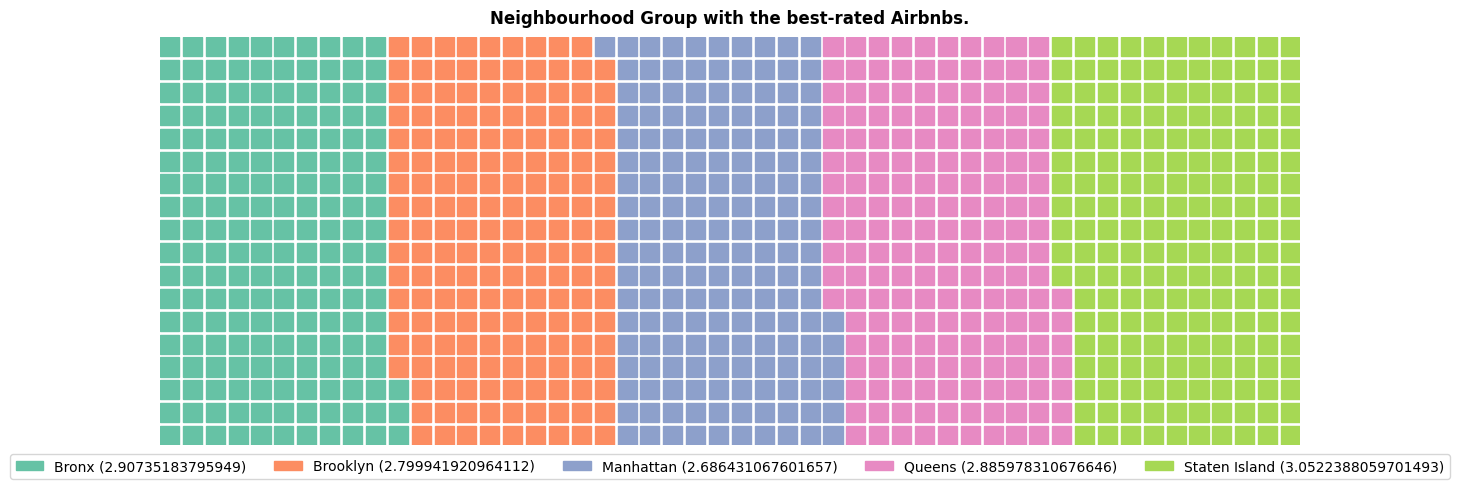

In [ ]:
from pywaffle import Waffle

df2 = df.groupby(["Neighbourhood Group"])["Review Rate Number"].mean()

fig = plt.figure(FigureClass=Waffle, figsize=(15, 5), rows=18, columns=50, values=df2, legend = {"labels": [f"{i} ({v})" for i, v in zip(df2.index, df2.values)], "loc":"lower center", "bbox_to_anchor":(.5, -.1), "ncols":5})
plt.title("Neighbourhood Group with the best-rated Airbnbs.", fontweight="bold", pad=10)


O gráfico de waffle está representando visualmente os valores médios da variável `Review Rate Number` em cada uma das regiões de `Neighbourhood Group`. Nessa análise, as médias são extremamente próximos, então a diferença visual não é muito aparente, porém é possível notar que em média as regiões do Bronx e Staten Island, são as que receberam as maiores notas, já a região de Manhattan a menor. Vale notar que Bronx e Staten Island são cidades menores e com menos imóveis para locação, então consequentemente o volume de avaliações é consideravelmente menor, gerando médias mais sensíveis a variações e menos consistentes, já a região de Manhattan é a que detém a maior quantidade, resultando em médias com baixa oscilação. Porém cabe uma verificação aprofundada, para averiguar se a menor avaliação média em cidades maiores, não se deve a uma menor satisfação dos usuários nessa região.

As variáveis `Lat` e `Long` são variáveis de geolocalização, que podem ser usadas para exibir no mapa informações relevantes, como a concentração de imóveis disponíveis para locação em cada bairro.
Já o Wordcloud permite visualizar valores categóricos, em uma agrupamento de palavras, reproduzindo a frenquência das palavras no tamanho de sua fonte. é possível utilizar este método na variável `Neighbourhood`, para verificar os bairros com mais Airbnb disponíveis.

In [ ]:
latlong_mean = df.groupby(["Neighbourhood"])[["Lat", "Long"]].agg("mean").reset_index()
latlong_mean["Count"] = df.groupby(["Neighbourhood"])["Lat"].count().values
lat_mean = df["Lat"].mean()
long_mean = df["Long"].mean()
max_count = latlong_mean["Count"].max()

def scale_radius(x):
    return 5 + (x / max_count) * 30

carto = flm.Map(location=[lat_mean, long_mean], zoom_start=10, tiles="CartoDB positron")

for _, row in latlong_mean.iterrows():
    popup_html=f"""
            <div style='max-width:200px; display:flex; flex-direction:column; align-items:center; white-space:nowrap'>
                <b>{row['Neighbourhood']}</b><br>
                <span>Count: ({row['Count']})</span>
            </div>
            """
    popup=flm.Popup(popup_html)

    flm.CircleMarker(
        location=[row["Lat"], row["Long"]],
        color=None,
        weight=0,
        radius=scale_radius(row["Count"]),
        fill=True,
        fill_color="#4444aa",
        fill_opacity=.5,
        popup=popup
        
    ).add_to(carto)

# Para visualizar com wsl:
# carto.save("../outputs/carto.html")
# sbp.Popen(["explorer.exe", "../outputs/carto.html"])

carto

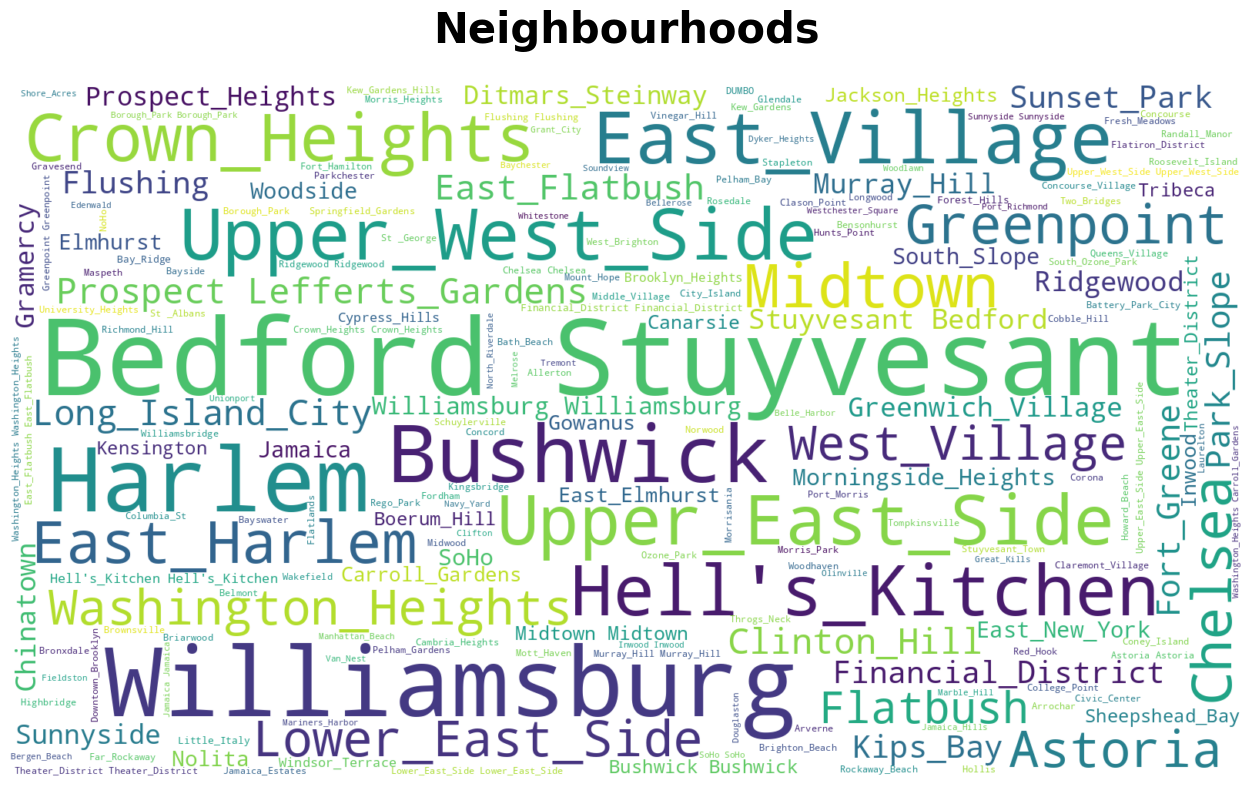

In [ ]:
from wordcloud import WordCloud, STOPWORDS

fig = plt.figure(figsize=(16, 9))
text = " ".join(df["Neighbourhood"].astype(str).str.replace(" ", "_"))

wc = WordCloud(
    background_color="white",
    width=1600,
    height=900,
).generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis(False)
plt.title("Neighbourhoods", pad=30, fontsize=30, weight="bold")

plt.show()

Tanto o Follium quanto o Wordcloud foram usados com o objetivo de exibir a quantidade de imóveis listados na plataforma da Airbnb em cada um dos bairros. No Folium, essa informação é retratada por meio do diametro de cada circulo no mapa, já no Wordcloud pelo tamanho da fonte de cada palavra. A partir desses gráficos, é possível confirmar a existencia de varios bairros com poucos imóveis listados, sugerindo que nessas localidades existem margem para que mais imóveis sejam listados. Essa informação, reforça a necessidade de politicas de incentivo, para que mais anfitriões se interessem pelos serviços ofertados pela plataforma. A plataforma deve tornar cada vez mais atrativa, pratica e barata, a listagem de imóveis, tanto para novos anfitriões, quanto para novas listagens ofertadas pelos já existentes.